# Descriptive Statistics Review

In this second part of the lab, we are going to continue working with the data that we cleaned in the last part. 
Be sure to continue to write clean code and comment your work well!

First, lets import our libraries and the data we saved. 

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
diamonds = pd.read_csv('diamonds_clean.csv')
diamonds = diamonds.drop('Unnamed: 0', axis=1)

Now that we cleaned our data, we can proceed with some exploratory analysis. We will analyze the features that affect price the most.

Let's start by looking at how the charateristics of a diamond (especially the price, since that's our focus) change based on its color. Remember that you can use the `groupby()` method in pandas. 

**Using the `describe()` method, take a look on the dataset paying special attention to the variability. Comment what you see.**

In [3]:
#your code here
diamonds.describe()

,carat,depth,table,price,x,y,z,New Clarity,New Color
count,53936.000000,53936.000000,53936.000000,53936.000000,53936.000000,53936.000000,53936.000000,53936.000000,53936.000000
mean,0.797896,61.749282,57.456897,3932.237689,5.731923,5.736728,3.540677,3.051061,3.405833
std,0.474001,1.432514,2.234048,3988.765574,1.119952,1.168463,0.706935,1.647106,1.701142
min,0.200000,43.000000,43.000000,326.000000,0.000000,3.680000,1.070000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000,2.000000,2.000000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,3.000000,3.000000
75%,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000,4.000000,5.000000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,7.000000,6.000000


In [4]:
#your comments here

Let's proceed to check each feature separately. 

**Before starting, which features do you think that will affect the price most and why? You will contrast your hypotheses with your results.**

In [5]:
#your hypotheses here
'''
I think that the carat value and the clarity will have the most affect on the price.
the bigger the rock, the more expensive.
'''

## 1. The `color` column
First, let's look at the color column.

**For each different color, find the mean of each column. You should have a matrix with every color as rows and the columns `carat`, `clarity`, etc as columns.**

In [24]:
#your code here
diamonds.groupby('New Color').mean()

,carat,depth,table,price,x,y,z,New Clarity
New Color,,,,,,,,
0.0,1.162137,61.887215,57.812393,5323.818020,6.519338,6.518105,4.033251,2.776353
1.0,1.026927,61.846385,57.577278,5091.874954,6.222826,6.222730,3.846369,2.964035
2.0,0.911758,61.836204,57.518114,4485.889197,5.985030,5.992629,3.701077,2.933638
3.0,0.771088,61.757449,57.288060,3998.145173,5.678549,5.681198,3.507966,3.463419
4.0,0.736544,61.694078,57.432998,3725.220755,5.616138,5.620634,3.465788,3.134382
5.0,0.657837,61.662119,57.490662,3076.537300,5.411524,5.421694,3.341496,2.970099
6.0,0.657715,61.698066,57.404355,3168.106436,5.417851,5.421928,3.343320,2.691025


**What do you see? Pay special attention to the relationship between price and color.**

In [8]:
#your thoughts here
'''
As the color improves, the average price also improves
'''

Let's go further into the color feature. We will plot the frequency distribution of the diamonds color in our dataset. 

**Plot the distribution and analyze it. Remember that you can use the pandas `plot()` method.**

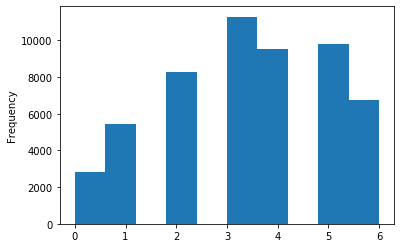

In [27]:
#your code here
diamonds['New Color'].plot(kind='hist')

In [10]:
#your comments here
'''There seems to be more diamonds of midrange color '''

## 2.The `carat` column 

Let's check the `carat` (weight), since this could also be a potential factor for price change.

**Find the mean of each column for each value of `carat` using the `groupby` method. Then comment your results.**

In [19]:
#your code here
diamonds.groupby('carat').mean()

,depth,table,price,x,y,z,New Clarity,New Color
carat,,,,,,,,
0.20,61.100000,59.333333,365.166667,3.786667,3.753333,2.303333,2.833333,5.166667
0.21,60.511111,58.444444,380.222222,3.874444,3.837778,2.332222,2.666667,5.444444
0.22,61.620000,60.400000,391.400000,3.898000,3.848000,2.386000,2.600000,4.800000
0.23,61.426621,58.034130,486.143345,3.946382,3.973379,2.431468,4.901024,4.518771
0.24,61.599213,57.488189,505.185039,3.990157,4.019331,2.465591,4.972441,4.185039
...,...,...,...,...,...,...,...,...
4.00,63.300000,58.000000,15984.000000,10.010000,9.940000,6.310000,0.000000,1.000000
4.01,61.750000,61.500000,15223.000000,10.080000,10.020000,6.205000,0.000000,0.500000
4.13,64.800000,61.000000,17329.000000,10.000000,9.850000,6.430000,0.000000,2.000000


In [13]:
#your comments
'''
The bigger the diamond the higher the price!
'''


**Plot a histogram of the `carat` column by using the `plot` method (see the docs to find an easy way to do so). What is happening?**

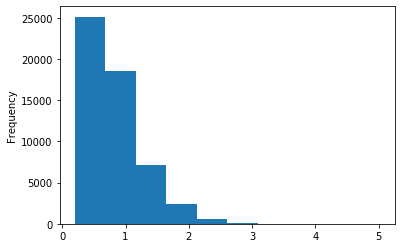

In [20]:
#your code here
diamonds.carat.plot(kind='hist')
'''there seems to be many more smaller diamonds that large ones'''

# 3. The `table` and `clarity` column
Finally, let's check the `table`.

**Find the mean of each column for each value of `table` using the `groupby` method. Then comment your results.**

In [28]:
#your code here
diamonds.groupby('table').mean()

,carat,depth,price,x,y,z,New Clarity,New Color
table,,,,,,,,
43.0,1.0400,62.90,4997.0,6.450,6.410,4.040,4.00,1.0
44.0,0.2900,62.80,474.0,4.200,4.240,2.650,4.00,5.0
49.0,0.6500,64.25,2290.5,5.355,5.320,3.425,3.00,3.0
50.0,1.5100,61.50,8995.5,7.380,7.295,4.510,2.00,3.0
50.1,0.9400,66.00,3353.0,6.130,6.170,4.060,1.00,2.0
...,...,...,...,...,...,...,...,...
71.0,0.6800,58.00,1633.0,5.850,5.700,3.350,2.00,3.0
73.0,0.6025,68.90,2406.5,5.520,5.465,3.745,3.25,4.5
76.0,0.7900,65.30,2362.0,5.520,5.130,3.350,2.00,3.0


In [18]:
#your comments here
'''I do not really see amy connections on this '''

**Finally, do the same with the `clarity` column.**

In [30]:
#your code here
diamonds.groupby('New Clarity').mean()

,carat,depth,table,price,x,y,z,New Color
New Clarity,,,,,,,,
0.0,1.283846,62.734278,58.303779,3924.168691,6.761093,6.709379,4.224688,2.968961
1.0,1.077701,61.771236,57.926512,5063.033181,6.403643,6.405626,3.954150,3.469865
2.0,0.850482,61.853042,57.662541,3996.001148,5.888383,5.888256,3.640636,3.448450
3.0,0.763850,61.724249,57.418040,3924.166204,5.658633,5.659782,3.492788,3.494370
4.0,0.727055,61.668000,57.313363,3838.699706,5.572753,5.585667,3.442372,3.162261
5.0,0.596202,61.663778,57.024990,3283.737071,5.218454,5.232118,3.221465,3.569483
6.0,0.503131,61.624521,56.883881,2519.512315,4.961721,4.976437,3.062132,3.350848
7.0,0.505123,61.510615,56.507207,2864.839106,4.968402,4.989827,3.061659,3.101676


In [21]:
#your comments here
'''As the clarity gets better the carat seems to get smaller'''

**After looking at your results, which features do you think will affect price the most now? Regarding your hypotheses, do they match your final results? Provide a small overview.**

In [23]:
#your thoughts here
'''These do seem to correlate to my hypothesis, but I do not think
that clarity will have as big an affect on price as I thought'''

# Bonus: taking a deeper look with plots and correlations

To take deeper look, we will use the `pairplot` method of `seaborn` library. This method plots a scatterplot for each pair of features and in the diagonal the distribution of the feature.

So if you have many features it will take a while, be careful!


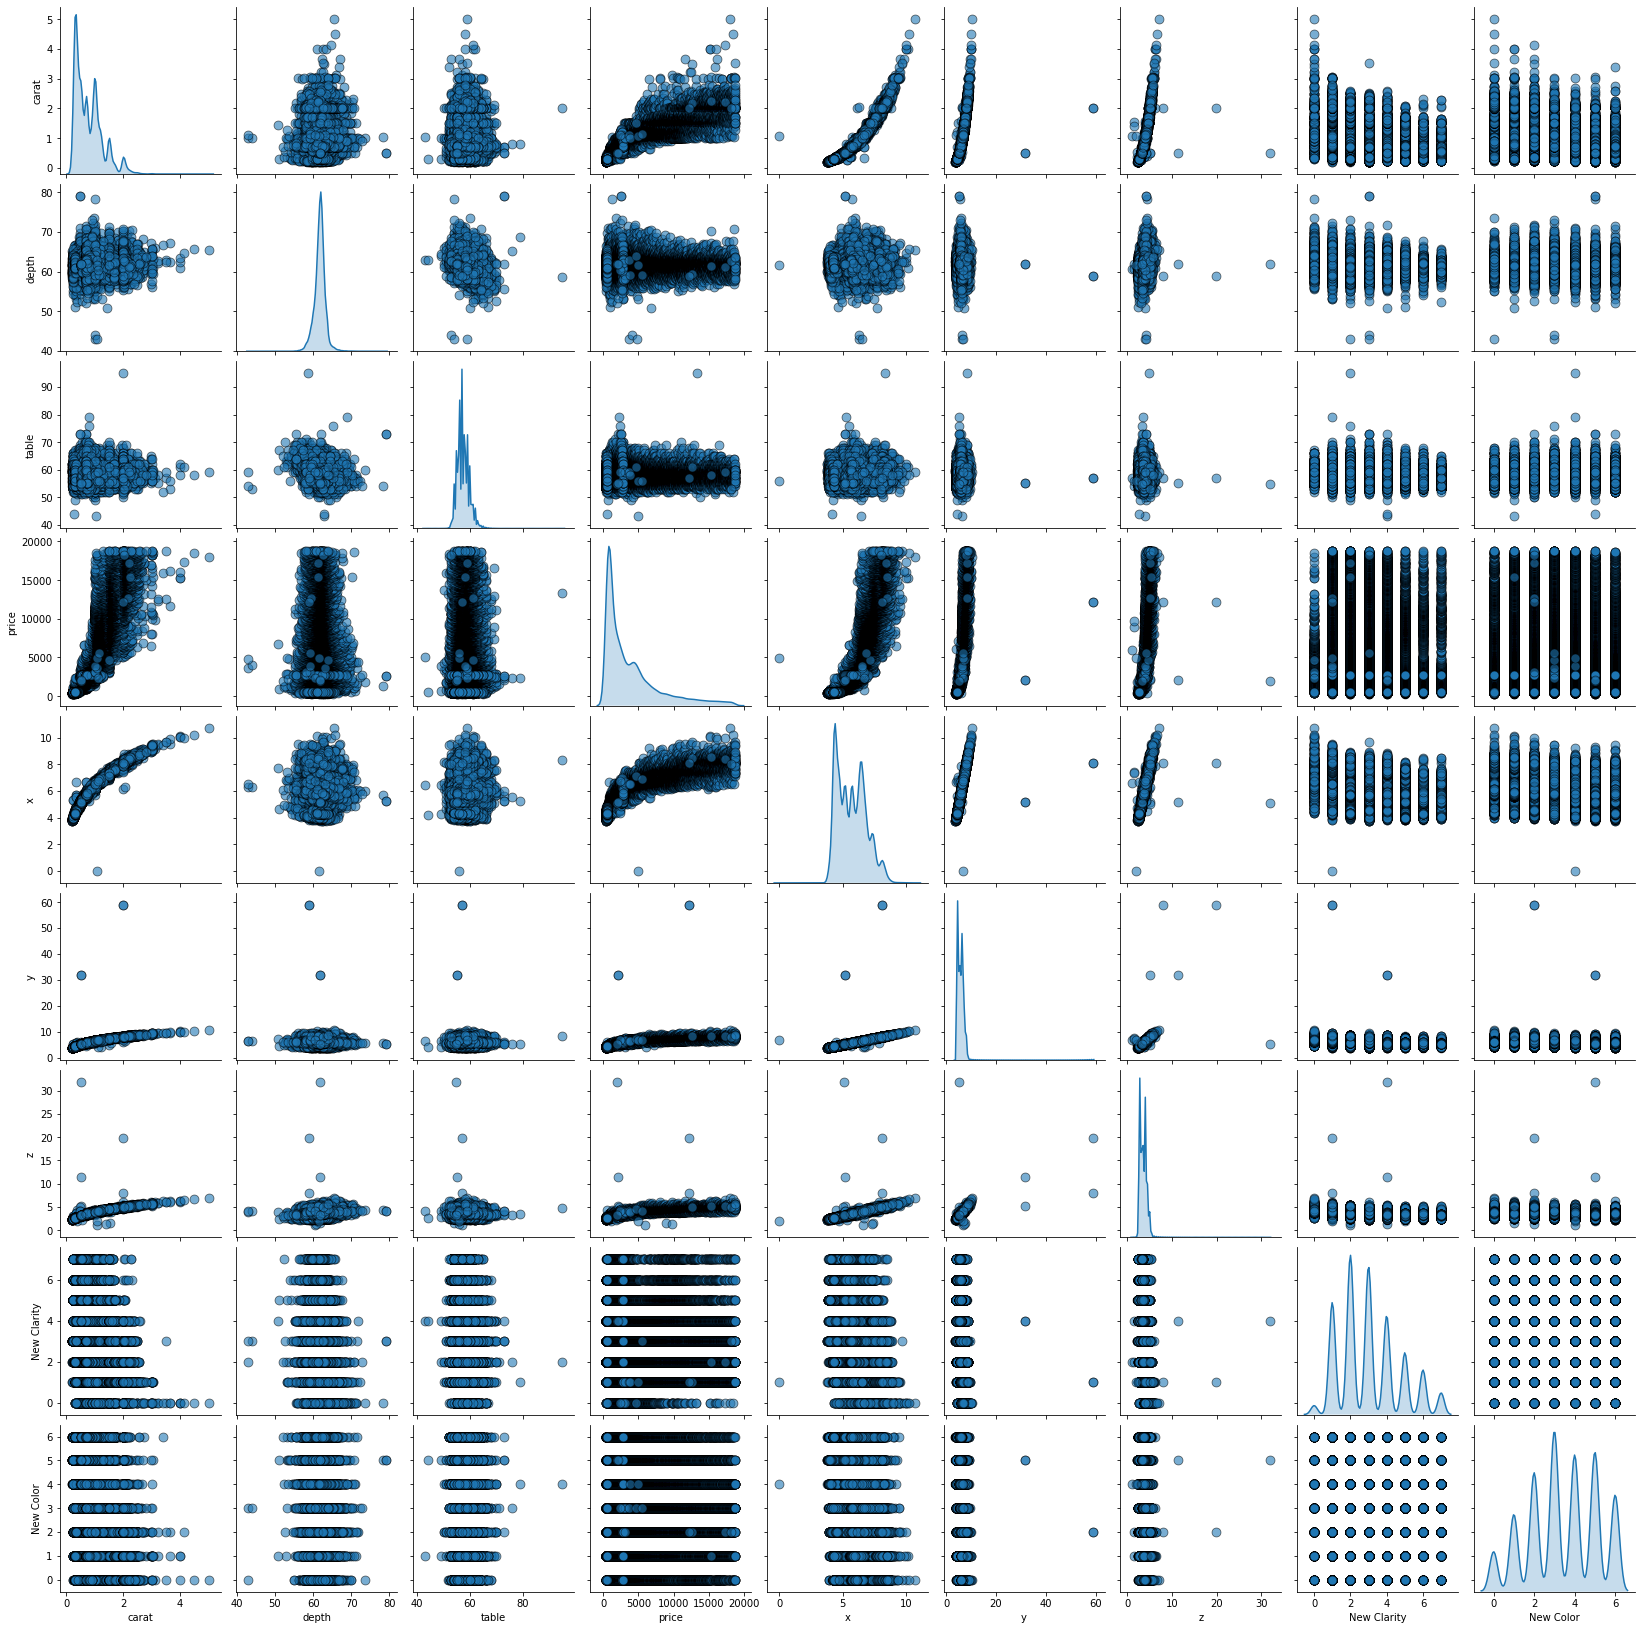

In [31]:
#Run this code
import seaborn as sns
sns.pairplot(diamonds, diag_kind = 'kde', plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'})

**What do you see here? What relationships between variables are the most interesting?**

In [ ]:
#your thoughts here
'''It seems the best indicator of price is carat'''

Now we will see a correlation matrix with a plot. As you know a higher correlation means that the feature could be an effect (**but is not for sure**) for the changes on the price.

We will see this with a matrix with colors. A lighter color means greater correlation. 

This is done with the `seaborn` library as well.

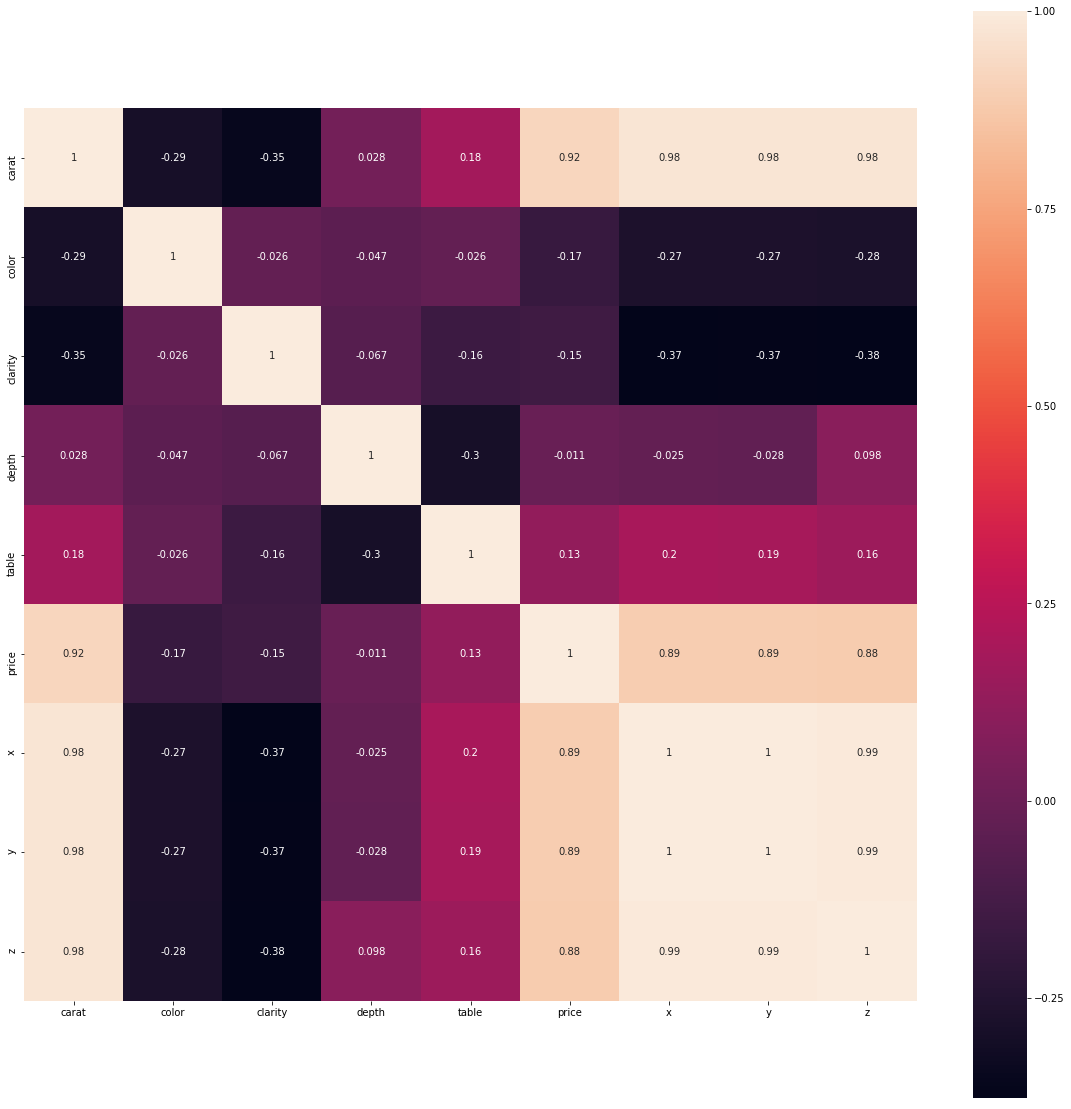

In [26]:
#Run this code
plt.figure(figsize=(20, 20))
p = sns.heatmap(diamonds.corr(), annot=True, square=True)

**What do you see here? Regarding the results before, does it fit with them?**

In [27]:
#your thoughts here
'''There is a pretty high correlation between price and carat 0.92'''

Finally, we will calculate the linear regression between the price and the weight. This will be done first by plotting it with the `seaborn` library and then calculating the error with the `scipy` library.

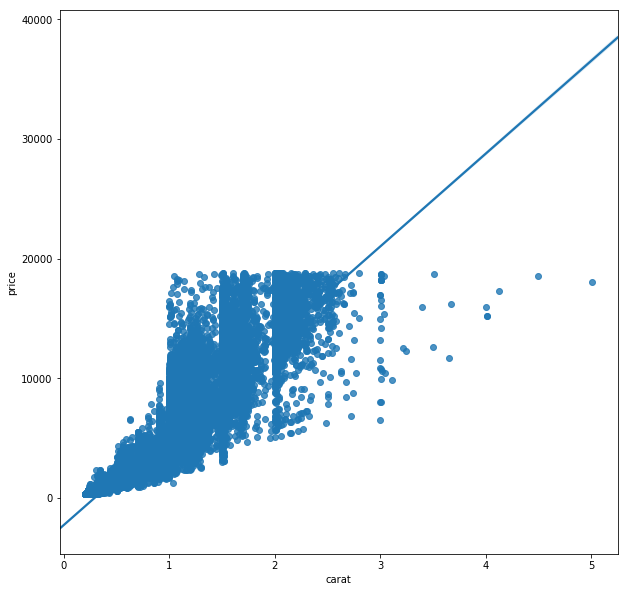

In [4]:
#Run this code
plt.figure(figsize=(10, 10))
sns.regplot(diamonds.carat, diamonds.price, scatter=True)


In [32]:
#Run this code
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(diamonds.carat, diamonds.price)
r2 = r_value ** 2
r2

0.8493764888273461

**What do you think?**

In [30]:
#your thoughts here
'''Carat seems to be the variable that most affects the price.'''

**Would you do any other checks on other features? Do you have any comments regarding `carat`?**

In [ ]:
#your thoughts here
'''Some purchase may be skewed slightly due to consumer interests.
For example, someone may want the biggest diamond regardless of the clarity
Someone else may opt for the one with the best clarity, but not need the 
biggest one.'''

**Conlcusion**

**From our dataset** we can conclude that although `color` and `clarity` have a classification, and thus an assigned importance or weight, they do not influence the monetary value of a diamond in determining way. While it is true that different colors or clarities may have different prices, upon closer examination those variations in price seem to be linked to `carat` (weight) and its `dimensions`. In our analysis, the key factor to determining a diamond's value was placed solely in the aforementioned features, since we can see in our correlation coefficients and in the coefficient of determination that these features are closely related.